##  Role of Momentum in Stock Price Movement

Picking the right stocks at right time is key to successful investment. There are great number of factors to consider for picking a stock. Here, we ask a simple question. **How big a role momentum plays in stock price movement?** If a stock has moved up (down) from its price *N* days ago, what is the chance that it will continue to raise (fall)? What is the ideal *N* value?

We consider the stock prices of four big corporations from four sectors (Apple – Tech, Exon – Energy, GM – Automobile and Bank of America – Finance) over a period of 17 years (2000–2016). 

To start with, we make the case as simple as possilbe. We assume buying and selling of stocks are done at the beginning and the end of the day, respectively, and ignore the price variation within a day. We also consider whether the stock  has soared (or fallen) from the price *N* days ago, and ignore fluctuations within this *N* days. In future we may include the effect of those fluctuations. The stock prices are accessed via Quandl API. 

In [1]:
#import libraries
%matplotlib inline
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#quandl private key for large downloads. 
#Its hidden here for obvious reasons
quandl.ApiConfig.api_key = ""

In [3]:
#data scraping from Quandl. Quandl returns a Pandas dataframe, which is saved as df
# First let's access Apple prices
df = quandl.get('WIKI/AMZN', start_date='2000-01-01', end_date='2016-12-31')
print(df.shape)

(4266, 12)


In [4]:
# checking for any missing data
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

Quandl provides clean data, so we do not really have to do it. 
But its a good practice to look at the data for missing values.

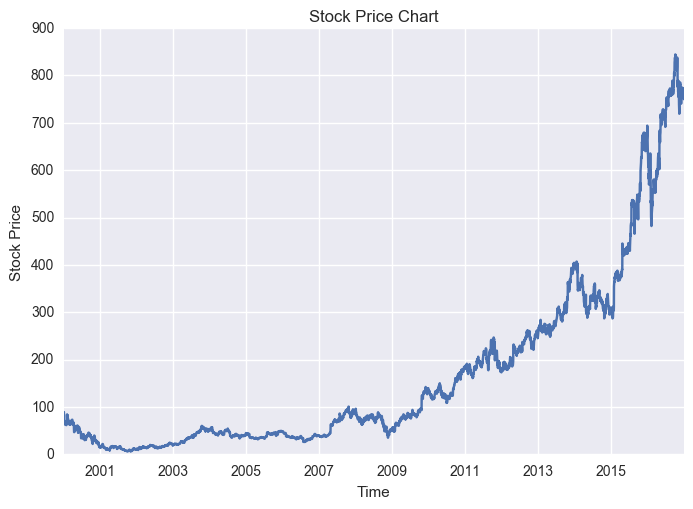

In [5]:
#plotting Adj. Close values 
plt.plot(df['Adj. Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Chart')

Many stocks are split when their prices go high. When a stock is split in to N stocks, its value drops by the same factor N. This is very inconveient for analysis. 'Adj' values are adjusted to stock splitting, so that we don't have to worry about such discontinuities. We thus keep only 'Adj.' values and delete the rest.

In [6]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend',\
         'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
df.head()

,Adj. Open,Adj. Close
Date,,
2000-01-03,81.50,89.38
2000-01-04,85.38,81.94
2000-01-05,70.50,69.75
2000-01-06,71.31,65.56
2000-01-07,67.00,69.56


### Price Change within a day and within N past days

Calculate the correlation between changes within a day ('today') and changes in the last *N* days. We vary N=1 to 10. 

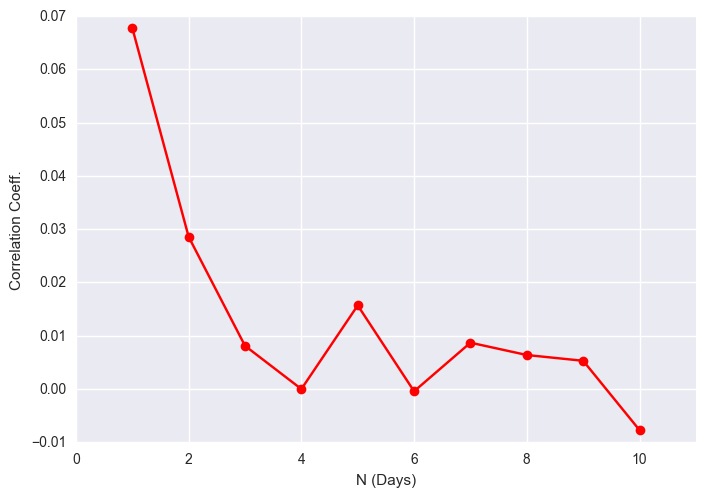

In [7]:
corr =[]
dtList = list(range(1,11))

for dN in dtList: 
    df['ShiftAdjOpen'] = df['Adj. Open'].shift(dN)
    df['1DayChange'] = df['Adj. Close']-df['Adj. Open']
    df['Shift1DayChange'] = df['1DayChange'].shift(-1)
    df['NDaysChange'] = df ['Adj. Close']-df['ShiftAdjOpen']
    df.drop(['1DayChange', 'ShiftAdjOpen'], axis=1, inplace=True)
    corr.append(np.corrcoef(df.dropna()['NDaysChange'], df.dropna()['Shift1DayChange'])[0][1])

plt.plot(dtList, corr, 'ro-', label='AAPL')
plt.xlim((0,11))
plt.xlabel('N (Days)')
plt.ylabel('Correlation Coeff.')
#corr

So the correlation is rather weak, suggesting momentum does not play significant role. Is it surprising? Not really. If simple features such as momentum played a role, there would be algorithms that would exploit that feature, levelling it off. 

### Technology Sector
So for Amazon stocks, the price change within a day is only weakly correlated with the price changes in the past few days. But is this observation generally true? We consider a few other large tech corporations. 

In [8]:
CorrListTech=[]
dtList = list(range(1,11))

TickList =['AMZN','FB', 'AAPL', 'MSFT', 'IBM', 'DELL', 'INTC']
for tick in TickList:
    df = quandl.get('WIKI/'+tick, start_date='2000-01-01', end_date='2016-12-31')
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend',\
         'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
    corr =[]

    for dN in dtList: 
        df['ShiftAdjOpen'] = df['Adj. Open'].shift(dN)
        df['1DayChange'] = df['Adj. Close']-df['Adj. Open']
        df['Shift1DayChange'] = df['1DayChange'].shift(-1)
        df['NDaysChange'] = df ['Adj. Close']-df['ShiftAdjOpen']
        df.drop(['1DayChange', 'ShiftAdjOpen'], axis=1, inplace=True)
        corr.append(np.corrcoef(df.dropna()['NDaysChange'], df.dropna()['Shift1DayChange'])[0][1])

    CorrListTech.append(corr)


Plotting Correlation

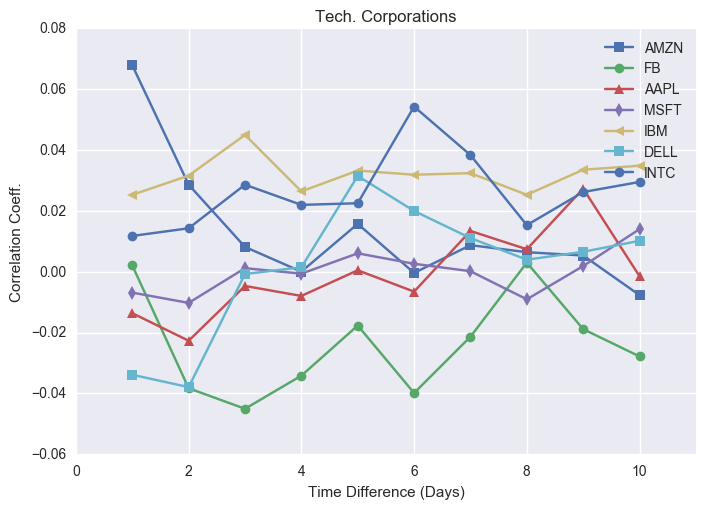

In [9]:
#plot the correlation
import itertools
marker = itertools.cycle(('s', 'o', '^', 'd', '<')) 
for ti in range(len(CorrListTech)):
    plt.plot(dtList, CorrListTech[ti], label=TickList[ti], marker=next(marker))


plt.legend()
plt.xlim(0,11)
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
plt.title('Tech. Corporations')


## Finance Sector

In [10]:
CorrListFin=[]
dtList = list(range(1,11))

TickList =['BAC', 'WFC', 'JPM', 'COF', 'C', 'GS', 'MS']#, 'PNC']
for tick in TickList:
    df = quandl.get('WIKI/'+tick, start_date='2000-01-01', end_date='2016-12-31')
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend',\
         'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
    corr =[]

    for dN in dtList: 
        df['ShiftAdjOpen'] = df['Adj. Open'].shift(dN)
        df['1DayChange'] = df['Adj. Close']-df['Adj. Open']
        df['Shift1DayChange'] = df['1DayChange'].shift(-1)
        df['NDaysChange'] = df ['Adj. Close']-df['ShiftAdjOpen']
        df.drop(['1DayChange', 'ShiftAdjOpen'], axis=1, inplace=True)
        corr.append(np.corrcoef(df.dropna()['NDaysChange'], df.dropna()['Shift1DayChange'])[0][1])

    CorrListFin.append(corr)



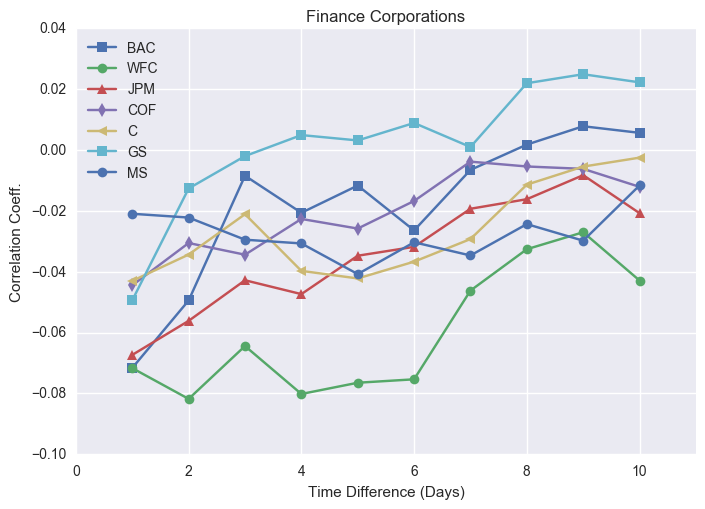

In [11]:
marker = itertools.cycle(('s', 'o', '^', 'd', '<')) 
for ti in range(len(CorrListFin)):
    plt.plot(dtList, CorrListFin[ti], label=TickList[ti], marker=next(marker))

plt.legend(loc='best')
plt.xlim(0,11)
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
plt.title('Finance Corporations')


Interestingly, **all Finance companies have negative correlation coefficient**! This means if the stock prices have gone up today, there is slightly higher probability for the prices to go down tomorrow (and vice versa). With the exemption of Goldman Sachs and BoA, the correlation coefficient does not go above zero within 10 days. 

### Statistical Significance

In [12]:
lstFin = [item[0] for item in CorrListFin]
lstTech = [item[0] for item in CorrListTech]

import scipy as sp
sp.stats.ttest_ind(lstTech, lstFin, equal_var=False)

Ttest_indResult(statistic=4.2341539439656053, pvalue=0.0019037836280551763)

## Conclusions

* The momentum is a weak factor deciding the stock price movement. 
* For finance companies there is a consistent negative correlation between momentum and 
* We consider only the correlation between past price change and "today's" price change. This means that soaring stocks, picked proportional to the percentage of price change would yield profits. However, it is unlikely that such a simple strategy will produce large profits.
* In future, we will consider fluctuations within the last *N* days. 
* We may also test our prediction by making an investment strategy of picking stocks based on the momentum and comparing their performance against control stocks. We will then examine whether there is a statistically significant difference between the two.
